In [67]:
import numpy as np
from scipy.signal import convolve2d
import cv2
import matplotlib.pyplot as plt

In [68]:
kernel = np.array([
    [  0,  -0.5,  0  ],
    [ -0.5,   1,  -0.5 ],
    [  0,  -0.5,  0  ]
], dtype=np.float32)

In [69]:
# Load the image in grayscale
image_path = "./data/sq.jpg" 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [70]:
# Pad the image with 1 layer of zeros
padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

# Perform 2D convolution
convolved_image = convolve2d(padded_image, kernel, mode='valid')

# Normalize the convolved image
convolved_image -= convolved_image.min()  # Shift minimum value to 0
if convolved_image.max() != 0:  # Prevent division by zero
    convolved_image = (convolved_image / convolved_image.max()) * 255

convolved_image = convolved_image.astype(np.uint8)

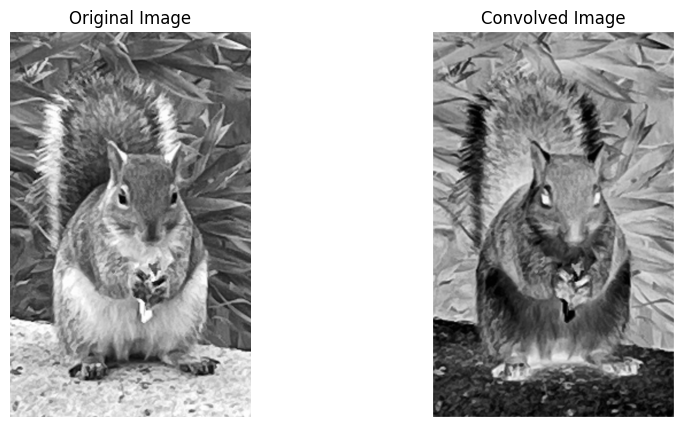

In [71]:
# Display the original and convolved images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(convolved_image, cmap='gray')
axes[1].set_title("Convolved Image")
axes[1].axis("off")

plt.show()